In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('../TextFiles/smsspamcollection.tsv', sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [5]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
len(df)

5572

In [7]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [8]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

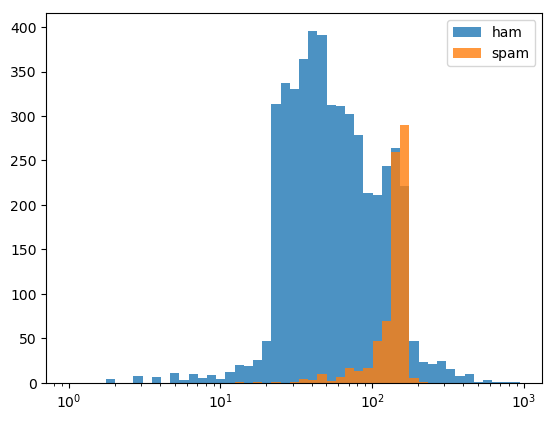

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

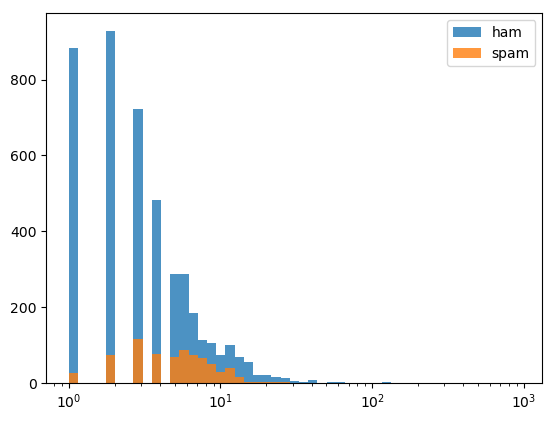

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
# X feature data
X = df[['length', 'punct']]
# y label data
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [13]:
X_train.shape, X_test.shape

((3900, 2), (1672, 2))

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
lr_model = LogisticRegression(solver='lbfgs')

In [16]:
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [17]:
from sklearn import metrics

In [18]:
predictions = lr_model.predict(X_test)

In [19]:
metrics.confusion_matrix(y_test, predictions)

array([[1404,   44],
       [ 219,    5]])

In [20]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

   micro avg       0.84      0.84      0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [21]:
print(metrics.accuracy_score(y_test, predictions))

0.8427033492822966


In [22]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

predictions = nb_model.predict(X_test)

print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

   micro avg       0.86      0.86      0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [24]:
from sklearn.svm import SVC

svc_model = SVC(gamma='auto')

svc_model.fit(X_train, y_train)

preds = svc_model.predict(X_test)

print(metrics.confusion_matrix(y_test,predictions))

[[1438   10]
 [ 224    0]]
